<a href="https://colab.research.google.com/github/Riddhamr/2048-Advance/blob/main/DIC_Project_Dicison%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading the Dataset from UCI :

  https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008
  https://www.hindawi.com/journals/bmri/2014/781670/tab1/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# We have copied the dataset to our github repo
diabetic_df = pd.read_csv('https://raw.githubusercontent.com/Riddhamr/DIC-Spring23-Project/main/diabetic_data.csv')
ids_mapping_df = pd.read_csv('https://raw.githubusercontent.com/Riddhamr/DIC-Spring23-Project/main/IDs_mapping.csv')

# New Section

In [ ]:
# Observing the data present in the diabetic dataframe
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# Renaming columns where names are not descriptive enough or confusing
diabetic_df.rename(columns={"patient_nbr": "patient_id", "time_in_hospital": "days_in_hospital", "payer_code": "insurance_code", "num_lab_procedures": "total_lab_procedures", 
                   "num_procedures": "total_procedures", "diag_1": "diagnosis_1", "diag_2": "diagnosis_2", "diag_3": "diagnosis_3", "A1Cresult": "a1c_test_result",
                   "glyburide-metformin": "glyburide_metformin", "glipizide-metformin": "glipizide_metformin", "glimepiride-pioglitazone": "glimepiride_pioglitazone",
                   "metformin-rosiglitazone": "metformin_rosiglitazone", "metformin-pioglitazone": "metformin_pioglitazone", "readmitted": "readmitted_type"}, inplace = True)

In [ ]:
# checking first 5 rows of the dataset
diabetic_df.head()

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted_type
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Observing the data present in the ids_mapping_df dataframe
ids_mapping_df

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [ ]:
# As we can see '?' in the weight column, we need to replace that with null value
diabetic_df = diabetic_df.replace('?', np.nan)
diabetic_df.head()

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted_type
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Setting the non numeric values to NaN
diabetic_df['diagnosis_1'] = pd.to_numeric(diabetic_df['diagnosis_1'], errors='coerce')
diabetic_df['diagnosis_2'] = pd.to_numeric(diabetic_df['diagnosis_2'], errors='coerce')
diabetic_df['diagnosis_3'] = pd.to_numeric(diabetic_df['diagnosis_3'], errors='coerce')

In [ ]:
# calculating null values present for each column in dataset
fields_with_nulls = (diabetic_df.isnull().sum()*100/diabetic_df.isnull().count()).sort_values(ascending=False)
fields_with_nulls = fields_with_nulls[fields_with_nulls != 0]
fields_with_nulls

weight               96.858479
medical_specialty    49.082208
insurance_code       39.557416
diagnosis_3           6.368532
diagnosis_2           2.843779
race                  2.233555
diagnosis_1           1.637089
dtype: float64

In [ ]:
# dropping columns encounter_id, patient_nbr, weight
def drop_col(data, col):
  if col in data:
    data.drop([col], axis=1, inplace=True)

# drop encounter_id & patient_nbr as they are irrelevant
drop_col(diabetic_df, 'encounter_id')
drop_col(diabetic_df, 'patient_nbr')
drop_col(diabetic_df,'patient_id')

# drop weight as 96% of the values are null
drop_col(diabetic_df, 'weight')


In [ ]:
# Age Group formatting from range string to average age value

for x in range(0,15):
    diabetic_df['age'] = diabetic_df['age'].replace('['+str(x*10)+'-'+str(10*x+10)+')', x*10+5)
diabetic_df['age'].value_counts()

75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64

In [ ]:
# medical_speciality ~50% are null -> replacing with a N/A category
diabetic_df['medical_specialty'] = diabetic_df['medical_specialty'].fillna('N/A')
diabetic_df['medical_specialty'].value_counts()

N/A                              49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [ ]:
# get top 8 medical_specialties
top_8_specialty = diabetic_df['medical_specialty'].value_counts()[:8].index.to_list()
top_8_specialty

['N/A',
 'InternalMedicine',
 'Emergency/Trauma',
 'Family/GeneralPractice',
 'Cardiology',
 'Surgery-General',
 'Nephrology',
 'Orthopedics']

In [ ]:
# Identify the medical specialties that are not among the top 8
not_top_8 = ~diabetic_df['medical_specialty'].isin(top_8_specialty)

# Replace the values of these medical specialties with 'Others'
diabetic_df.loc[not_top_8, 'medical_specialty'] = 'Others'

In [ ]:
# insurance_code -> replacing nulls with a N/A category
diabetic_df['insurance_code'] = diabetic_df['insurance_code'].fillna('N/A')
diabetic_df['insurance_code'].value_counts()

N/A    40256
MC     32439
HM      6274
SP      5007
BC      4655
MD      3532
CP      2533
UN      2448
CM      1937
OG      1033
PO       592
DM       549
CH       146
WC       135
OT        95
MP        79
SI        55
FR         1
Name: insurance_code, dtype: int64

In [ ]:
# Checking and mapping the output variable 'readmitted_type' to three class 
diabetic_df['readmitted_type'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted_type, dtype: int64

In [ ]:
diabetic_df.replace({'NO': 0, '<30':1, '>30':2}, inplace=True)
diabetic_df['readmitted_type'].value_counts()

0    54864
2    35545
1    11357
Name: readmitted_type, dtype: int64

In [ ]:
diabetic_df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,insurance_code,medical_specialty,total_lab_procedures,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted_type
0,Caucasian,Female,5,6,25,1,1,N/A,Others,41,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,15,1,1,7,3,N/A,N/A,59,...,No,Up,No,No,No,No,No,Ch,Yes,2
2,AfricanAmerican,Female,25,1,1,7,2,N/A,N/A,11,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,35,1,1,7,2,N/A,N/A,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,45,1,1,7,1,N/A,N/A,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,1,3,7,3,MC,N/A,51,...,No,Down,No,No,No,No,No,Ch,Yes,2
101762,AfricanAmerican,Female,85,1,4,5,5,MC,N/A,33,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,Caucasian,Male,75,1,1,7,1,MC,N/A,53,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Caucasian,Female,85,2,3,7,10,MC,Surgery-General,45,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [ ]:
# labelling diagnosis related fields with their proper category as per ICD9 values
import re
diagnosis_cols = ['diagnosis_1', 'diagnosis_2', 'diagnosis_3']

def remove_1st_char(value):
    value = re.sub("V[0-9]*|E[0-9]*", "0", value)
    value = value.replace('NaN', '-1')
    return value

def map_diagnosis(value):
    if 390 <= value <= 459 or value == 785:
        category = 'Circulatory'
    elif 460 <= value <= 519 or value == 786:
        category = 'Respiratory'
    elif 520 <= value <= 579 or value == 787:
        category = 'Digestive'
    elif value == 250:
        category = 'Diabetes'
    elif 800 <= value <= 999:
        category = 'Injury'          
    elif 710 <= value <= 739:
        category = 'Musculoskeletal'   
    elif 580 <= value <= 629 or value == 788:
        category = 'Genitourinary'
    elif 140 <= value <= 239:
        category = 'Neoplasms'
    elif value == -1:
        category = 'NAN'
    else:
        category = 'Other'

    return category


for diag in diagnosis_cols:
    diabetic_df[diag] = diabetic_df[diag].apply(str)
    diabetic_df[diag] = diabetic_df[diag].map(remove_1st_char)
    diabetic_df[diag] = diabetic_df[diag].astype(float)

for diag in diagnosis_cols:
    diabetic_df[diag] = diabetic_df[diag].map(map_diagnosis)

diabetic_df['diagnosis_1'].value_counts()

Circulatory        30437
Other              26715
Respiratory        14423
Digestive           9475
Injury              6974
Genitourinary       5117
Musculoskeletal     4957
Neoplasms           3433
Diabetes             235
Name: diagnosis_1, dtype: int64

EDA

In [ ]:
diabetic_df.describe()

,age,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,total_lab_procedures,total_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_type
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,65.967022,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.810163
std,15.940838,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.923239
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,55.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,65.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,75.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.000000
max,95.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,2.000000


In [ ]:
# Printing Unique values
for column in diabetic_df.columns:
    print(f"{column} uniques: {len(diabetic_df[column].unique())} ")

race uniques: 6 
gender uniques: 3 
age uniques: 10 
admission_type_id uniques: 8 
discharge_disposition_id uniques: 26 
admission_source_id uniques: 17 
days_in_hospital uniques: 14 
insurance_code uniques: 18 
medical_specialty uniques: 9 
total_lab_procedures uniques: 118 
total_procedures uniques: 7 
num_medications uniques: 75 
number_outpatient uniques: 39 
number_emergency uniques: 33 
number_inpatient uniques: 21 
diagnosis_1 uniques: 9 
diagnosis_2 uniques: 9 
diagnosis_3 uniques: 9 
number_diagnoses uniques: 16 
max_glu_serum uniques: 4 
a1c_test_result uniques: 4 
metformin uniques: 4 
repaglinide uniques: 4 
nateglinide uniques: 4 
chlorpropamide uniques: 4 
glimepiride uniques: 4 
acetohexamide uniques: 2 
glipizide uniques: 4 
glyburide uniques: 4 
tolbutamide uniques: 2 
pioglitazone uniques: 4 
rosiglitazone uniques: 4 
acarbose uniques: 4 
miglitol uniques: 4 
troglitazone uniques: 2 
tolazamide uniques: 3 
examide uniques: 1 
citoglipton uniques: 1 
insulin uniques: 4

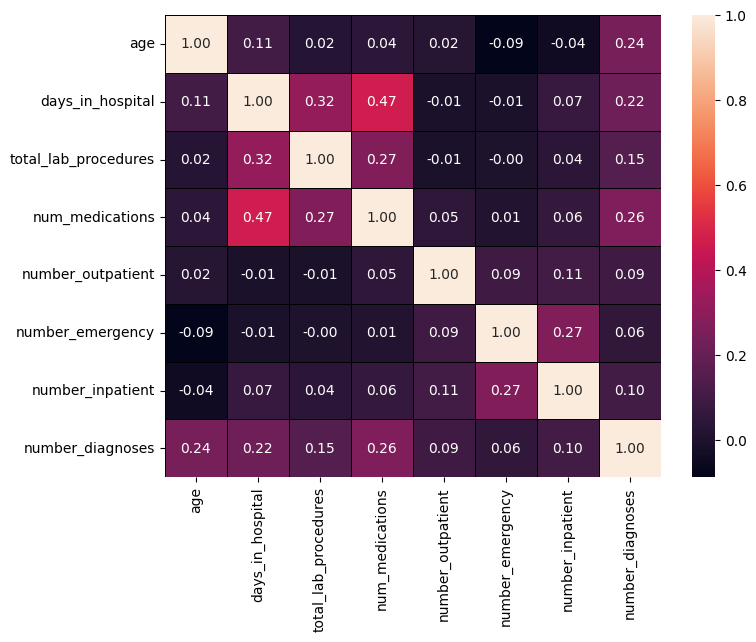

In [ ]:
numerical_columns = ['age', 'days_in_hospital', 'total_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(diabetic_df[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax)
plt.show()

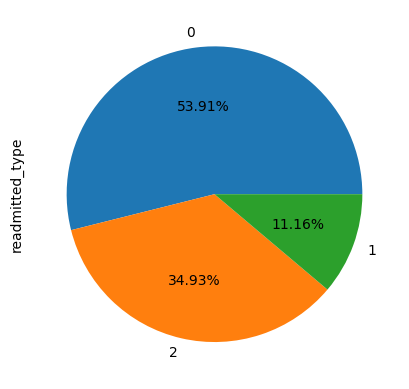

In [ ]:
# We have designated the following labels to readmitted_type
# 0 : not readmitted
# 1 : readmitted before 30 days
# 2 : readmitted after 30 days 

diabetic_df['readmitted_type'].value_counts().plot.pie(autopct = '%.2f%%')
plt.show()

In [ ]:
# # We have labeled the age group with the avg age
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.countplot(data = diabetic_df, x='age', hue="age")
# plt.show()

In [ ]:
# # Analyzing how no. of days spent in hospital affects the readmission 
# sns.displot(diabetic_df, x="days_in_hospital", hue = 'readmitted_type', kind="kde")
# plt.title('Days spent in Hospital vs Readmission Rate')
# plt.show()

In [ ]:
# for feature in diabetic_df.iloc[:, 22:45].columns:
#   diag = sns.FacetGrid(diabetic_df, col=feature)
#   diag.map(sns.histplot, "readmitted_type")
#   plt.show()
  

In [ ]:
# Plotting Diagnosis related fields according to their counts
# fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(15,12))
# diagnosis_features = ['diagnosis_1', 'diagnosis_2', 'diagnosis_3']

# for i in range(len(diagnosis_features)):
#     feature = diabetic_df[diagnosis_features[i]]
#     sns.countplot(feature, hue=diabetic_df['readmitted_type'], ax=ax[i], order = feature.value_counts().index)
# plt.show()

In [ ]:
diabetic_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,insurance_code,medical_specialty,total_lab_procedures,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted_type
0,Caucasian,Female,5,6,25,1,1,N/A,Others,41,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,15,1,1,7,3,N/A,N/A,59,...,No,Up,No,No,No,No,No,Ch,Yes,2
2,AfricanAmerican,Female,25,1,1,7,2,N/A,N/A,11,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,35,1,1,7,2,N/A,N/A,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,45,1,1,7,1,N/A,N/A,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [ ]:
# #plot the pair plot of salary, balance and age in data dataframe.
# sns.pairplot(data = diabetic_df, vars=['diagnosis_1', 'diagnosis_2', 'diagnosis_3'])
# plt.show()

In [ ]:
# sns.pairplot(data = diabetic_df, vars=['age', 'days_in_hospital', 'total_lab_procedures', 'num_medications', 'number_emergency', 'number_inpatient', 'number_diagnoses'])

In [ ]:
# # Q-Q plot - to determine whether the sample data follows a particular theoretical distribution
# import scipy.stats as stats
# stats.probplot(diabetic_df['age'], dist="norm", plot=plt)

In [ ]:
# # EDA Analysis for Num of Medications
# stats.probplot(diabetic_df['num_medications'], dist="norm", plot=plt)

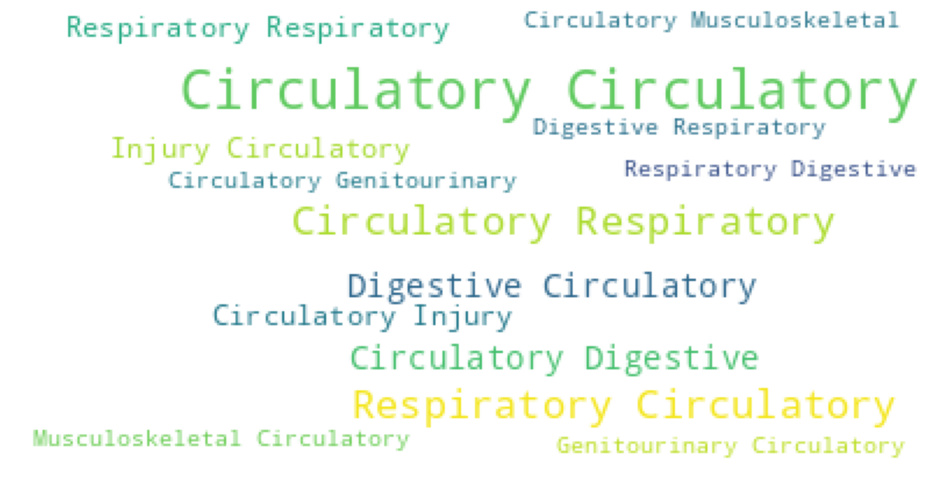

In [ ]:
# Wordcloud shows word count by size of occurance
from wordcloud import WordCloud, STOPWORDS

diagnosis_types = ''
stopwords = set(STOPWORDS)
 
for val in diabetic_df['diagnosis_1']:
    tokens = val.split()
    diagnosis_types += " ".join(tokens)+" "
 
wordcloud = WordCloud(background_color='white',stopwords = stopwords,min_font_size = 10).generate(diagnosis_types)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# def boxPlotAndRemoveOutliers(dataset, col):
#   print(col, "-- Info ")
#   sns.boxplot(data=dataset[col], showmeans=True ).set(title="Box Plot of "+col)
#   print(dataset[col].describe())
#   q1 = dataset[col].quantile(0.25)
#   q3 = dataset[col].quantile(0.75)
#   iqr = q3 - q1
#   lower_limit = q1 - 1.5 * iqr
#   upper_limit = q3 + 1.5 * iqr
#   print("Upper Limit :",upper_limit)
#   print("Lower Limit :",lower_limit)
#   dataset_filtered = dataset[(dataset[col]>lower_limit) & (dataset[col]<upper_limit)]
#   print("Filterd rows :",len(dataset_filtered), "of",len(dataset))
#   return dataset_filtered

In [ ]:
# # numerical_columns = ['age', 'days_in_hospital', 'total_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
# diabetic_df = boxPlotAndRemoveOutliers(diabetic_df, 'age')
# diabetic_df = diabetic_df.reset_index(drop= True)

In [ ]:
# diabetic_df = boxPlotAndRemoveOutliers(diabetic_df, 'days_in_hospital')
# diabetic_df = diabetic_df.reset_index(drop= True)

In [ ]:
# diabetic_df = boxPlotAndRemoveOutliers(diabetic_df, 'total_lab_procedures')
# diabetic_df = diabetic_df.reset_index(drop= True)

In [ ]:
# diabetic_df = boxPlotAndRemoveOutliers(diabetic_df, 'num_medications')
# diabetic_df = diabetic_df.reset_index(drop= True)

In [ ]:
# diabetic_df = boxPlotAndRemoveOutliers(diabetic_df, 'number_inpatient')
# diabetic_df = diabetic_df.reset_index(drop= True)

In [ ]:
# diabetic_df = boxPlotAndRemoveOutliers(diabetic_df, 'number_diagnoses')
# diabetic_df = diabetic_df.reset_index(drop= True)